# Assignment 1 Overview

According to assignment specification, in this assignment, we will develop Python code to classify `Sneakers` versus `Sandals` using the Fashion-MNIST dataset by using logistic regression and k-NN classifiers. We will use Grid Search and cross-validation to find the optimal hyperparameters of the model (e.g., the regularisation hyperparameter) and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.


# Get the Data

"Fashion-MNIST is a dataset motivated by the popular MNIST dataset used to classify handwritten digits. It contains examples of ten classes (e.g. sneakers, coats, sandals, trousers, pullovers, etc.). Fashion-MNIST has a training set with 60,000 examples and a test set with 10,000 examples. Each example is a 28 x 28 low-resolution and grayscale image (similar to the examples in MNIST) associated with a label from one of the ten classes."


## Load the Data


In [1]:
from pathlib import Path
import pandas as pd

train_set = pd.read_csv(Path("FMNIST_training_set.csv"), header=None)
test_set = pd.read_csv(Path("FMNIST_test_set.csv"), header=None)
train_labels = pd.read_csv(Path("FMNIST_training_set_labels.csv"), header=None)
test_labels = pd.read_csv(Path("FMNIST_test_set_labels.csv"), header=None)

## Take a Quick Look at the Data Structure


In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 358.9 MB


In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtering out "Sneakers" and "Sandals" Only


In [4]:
SNEAKER = 7
SANDAL = 5


def filter_data(labels, dataset):
    mask = labels.iloc[:, 0].isin([SNEAKER, SANDAL])
    labels_filtered = labels[mask]
    # Replace 5 with 1, replace 7 with 0
    labels_filtered = labels_filtered.iloc[:, 0].replace(
        {SANDAL: 1, SNEAKER: 0})
    dataset_filtered = dataset[mask]
    return labels_filtered, dataset_filtered


# For the training data
train_labels, train_set = filter_data(
    train_labels, train_set)

# For the test data
test_labels, test_set = filter_data(test_labels, test_set)

## Task D1


In [5]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, bbox_inches='tight', pad_inches=0.3, ** kwargs):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution,
                bbox_inches=bbox_inches, pad_inches=pad_inches, **kwargs)

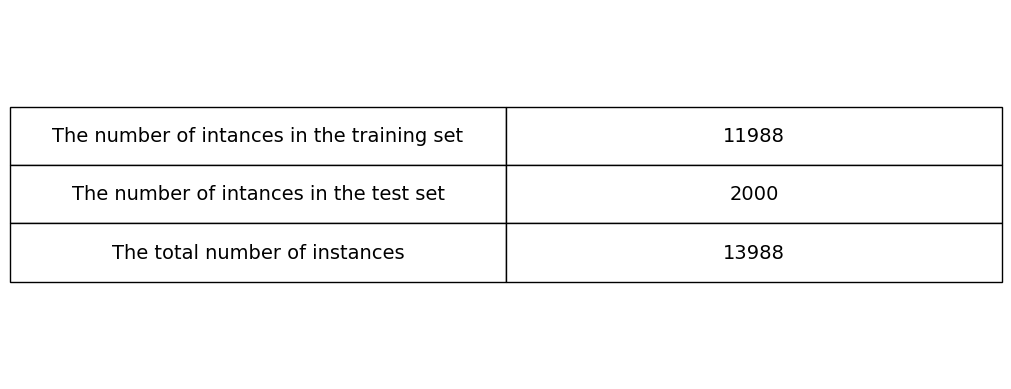

In [6]:
# Get the number of intances in the training set and test set
nrows_train_set = len(train_set)
nrows_test_set = len(test_set)
total_instances = nrows_train_set + nrows_test_set

table_content = [['The number of intances in the training set', nrows_train_set], [
    'The number of intances in the test set', nrows_test_set], ['The total number of instances', total_instances]]

# How to plot a table?
# Reference: https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
# https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
# https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.margins(x=0, y=0)
table = ax.table(cellText=table_content, loc='center', cellLoc='center')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d1", tight_layout=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [7]:
test_labels

8       1
9       0
11      1
12      0
21      1
       ..
9976    1
9986    0
9987    1
9990    1
9999    1
Name: 0, Length: 2000, dtype: int64

In [8]:
test_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,80,77,0,0,0


In [9]:
train_labels

12       1
30       1
36       1
41       0
43       1
        ..
59979    0
59983    1
59992    0
59995    1
59999    1
Name: 0, Length: 11988, dtype: int64

In [10]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,65,53,45,33,17,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task D2


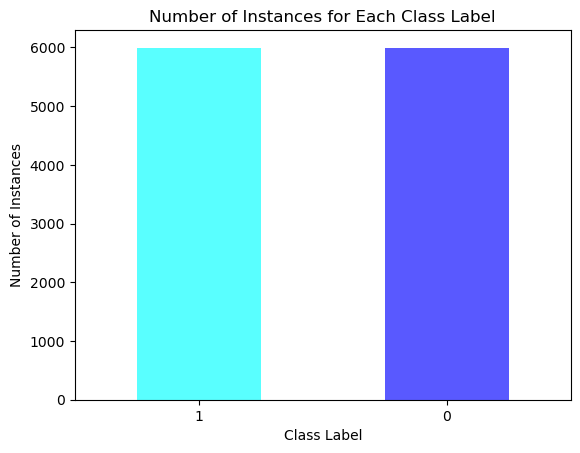

In [11]:
# Provide a bar plot showing the number of instances for each class label
# cmap = plt.get_cmap('viridis')

class_counts = train_labels.value_counts()
class_counts.plot(kind='bar', color=['cyan', 'blue'], alpha=0.65)

plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.title('Number of Instances for Each Class Label')
save_fig("d2_class_label_balance", tight_layout=False)
plt.show()

## Task D3

Plot the first six images/examples from each class with the corresponding example id and associated label on the top of the plot.


### Plot A Single Shoe


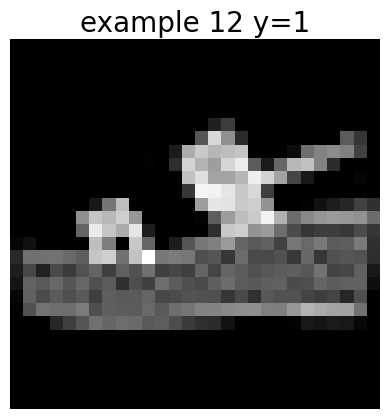

In [12]:
import matplotlib.pyplot as plt


def plot_shoe(image_data, id, label):

    image = image_data.reshape(28, 28)
    title = 'example '+str(id)+' y='+str(label)
    plt.imshow(1-image, cmap="binary")

    plt.axis("off")
    plt.title(title, fontsize=20)


some_shoe = train_set.iloc[0].to_numpy()
plot_shoe(some_shoe, train_set.index[0], train_labels.iloc[0])
plt.show()

### Filter Data

Get data of the first six images/examples from each class.


In [13]:
count = 0
count_0 = 0
count_1 = 0
idx = 0
selected_indices = []
example_ids = []
example_labels = []

while count < 12:
    label = train_labels.iloc[idx]
    if label == 1 and count_1 < 6:
        count += 1
        count_1 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([1])
    elif label == 0 and count_0 < 6:
        count += 1
        count_0 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([0])
    idx += 1

selected_data = train_set.iloc[selected_indices]

### Plot Shoes


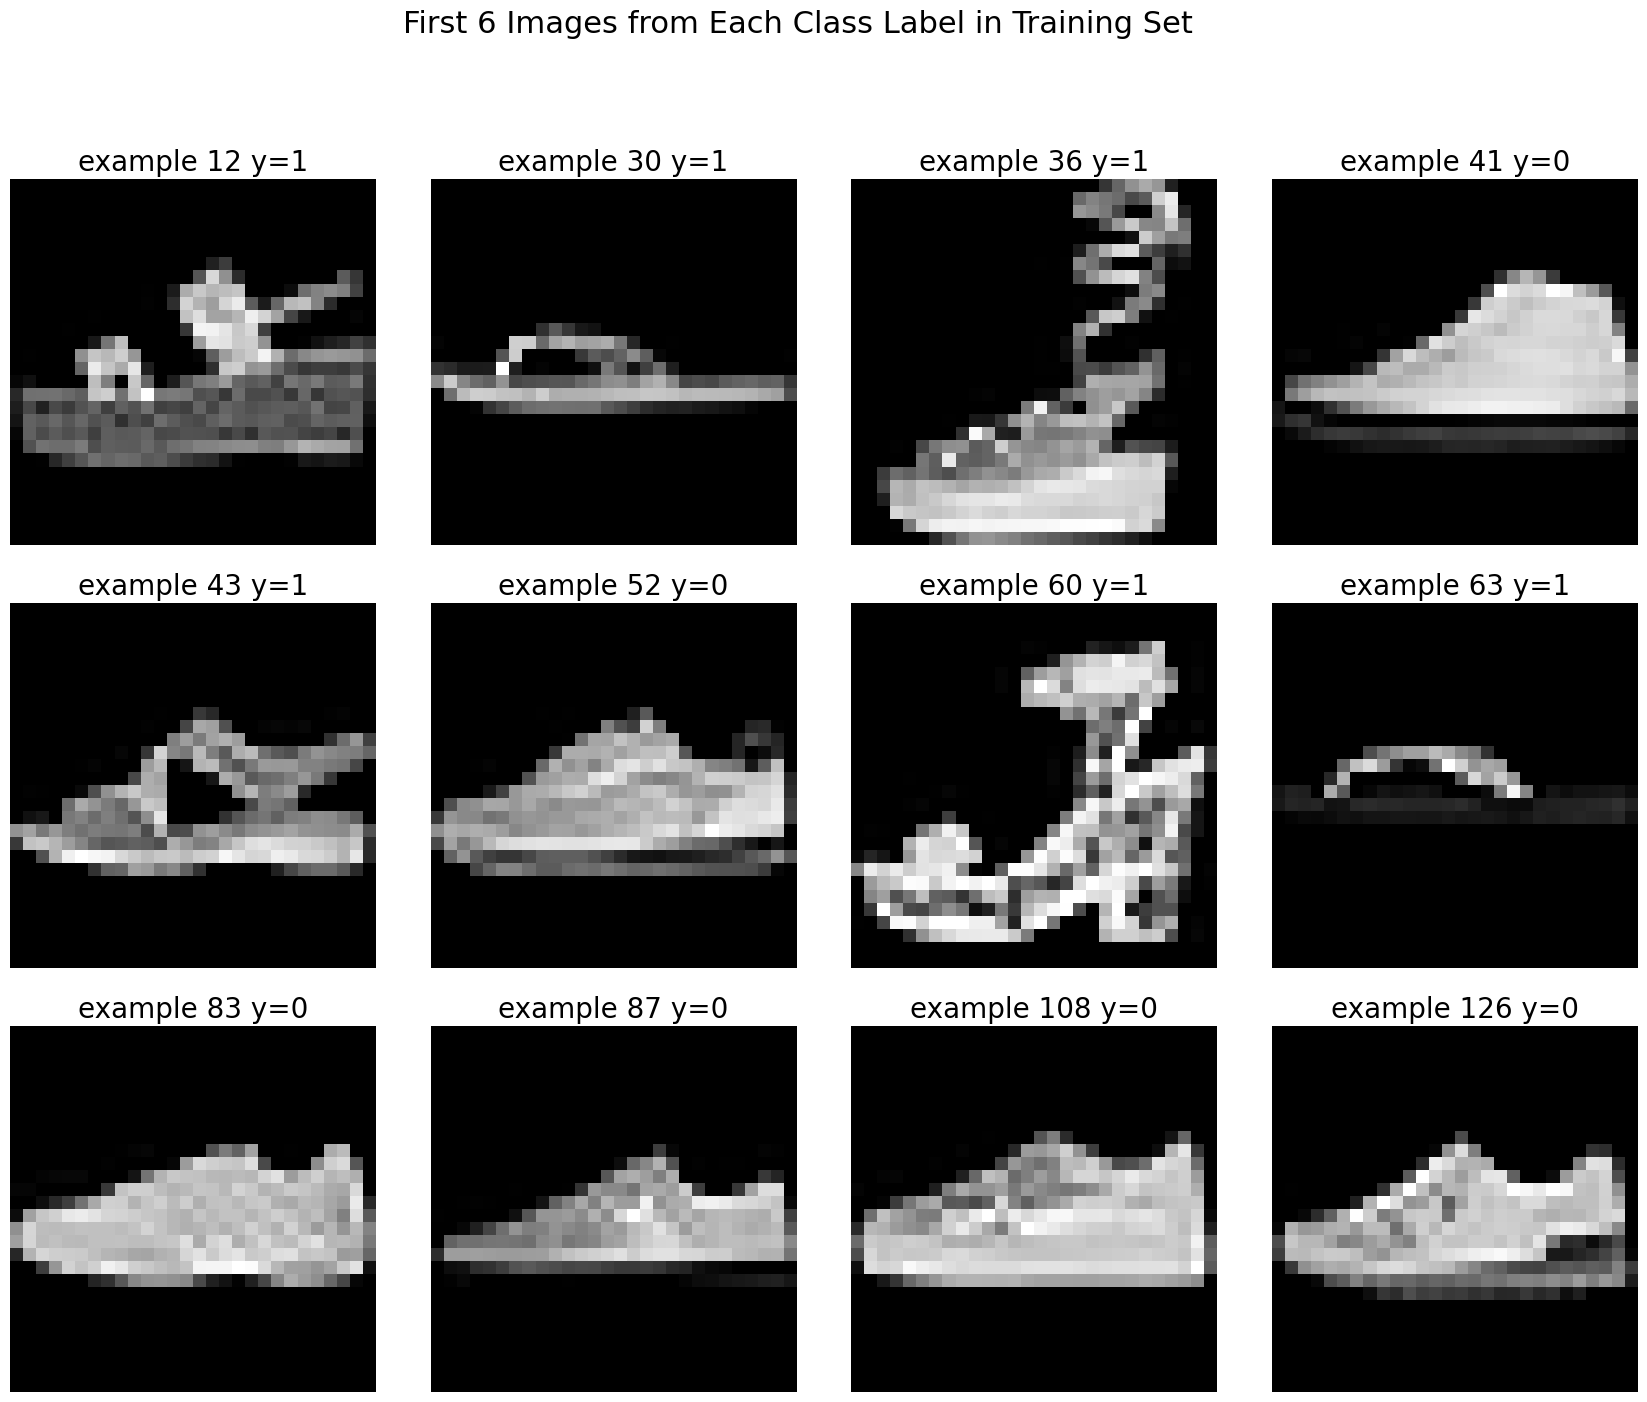

In [66]:
plt.figure(figsize=(21, 16))
for idx, image_data in enumerate(selected_data.to_numpy()):
    plt.subplot(3, 4, idx + 1)
    plot_shoe(image_data, example_ids[idx], example_labels[idx])

plt.subplots_adjust(wspace=0.15, hspace=0.1)
plt.suptitle(
    'First 6 Images from Each Class Label in Training Set', fontsize=22)
save_fig("d3_shoes_plot", tight_layout=False)
plt.show()

# Implement Logistic Regression from Scratch


## Split Data

Split your training data (that you constructed on “summarising the datasets”) into two sets: training and validation. Select randomly 80% for training and 20% for validation.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_set, train_labels, test_size=0.2, random_state=5508)

## Add Dummy Feature and Scale Features


In [16]:
import random
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import accuracy_score


random.seed(5508)

# Add x0=1 to every instance
X_train_b = add_dummy_feature(X_train)
X_val_b = add_dummy_feature(X_val)
X_test_b = add_dummy_feature(test_set)


N_EPOCHS = 10000

# # Reference: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/?ref=header_search
# std_scaler = StandardScaler()
# x_train_b_scaled = std_scaler.fit_transform(X_train_b)
# x_val_b_scaled = std_scaler.transform(X_val_b)
# x_test_b_scaled = std_scaler.transform(X_test_b)

## Define Logistic Regression Classifier


In [17]:
# Reference: https://www.kaggle.com/code/sugataghosh/implementing-logistic-regression-from-scratch/notebook
# Reference: https://github.com/casper-hansen/Logistic-Regression-From-Scratch/blob/main/src/logistic_regression/model.py
# Reference: https://atmamani.github.io/projects/ml/implementing-logistic-regression-in-python/
# Reference: https://www.kaggle.com/code/hamzaboulahia/logistic-regression-mnist-classification
class CustomLogisticRegression():
    def __init__(self, learning_rate):
        self.train_losses = []
        self.val_losses = []
        # explain in report: why accuracy? we have a balanced dataset
        self.train_misclassifications = []
        self.val_misclassifications = []
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    # Reference: https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1/(1+z)
        else:
            z = np.exp(x)
            return z/(1+z)

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        loss = -(y_true * np.log(y_pred + epsilon) +
                 (1-y_true) * np.log(1 - y_pred + epsilon))
        return np.mean(loss)

    def compute_gradients(self, x, y_true, y_pred, n_samples):
        difference = y_pred-y_true
        return np.matmul(difference, x)/n_samples

    def fit(self, x_train, y_train, x_val, y_val, n_epochs):   # y.shape (m,)   x.shape(m,n)
        n_samples, n_features = x_train.shape
        self.theta = np.random.rand(n_features)  # (n,)

        for _ in range(n_epochs):
            z = np.matmul(x_train, self.theta)
            pred = self._sigmoid(z)  # estimate probability
            gradients = self.compute_gradients(
                x_train, y_train, pred, n_samples)
            self.theta -= self.learning_rate*gradients
            loss = self.compute_loss(y_train, pred)
            self.train_losses.append(loss)
            class_pred = [1 if p > 0.5 else 0 for p in pred]
            self.train_misclassifications.append(
                1-accuracy_score(y_train, class_pred))

            val_pred = self._sigmoid(np.matmul(x_val, self.theta))
            val_class_pred = [1 if p > 0.5 else 0 for p in val_pred]
            val_loss = self.compute_loss(y_val, val_pred)
            self.val_losses.append(val_loss)
            self.val_misclassifications.append(
                1-accuracy_score(y_val, val_class_pred))

    def predict(self, x):
        threshold = 0.5
        pred = self._sigmoid(np.matmul(x, self.theta))
        class_pred = [1 if p > threshold else 0 for p in pred]
        return np.array(class_pred)

## Task D4

Experiment with some values for η, the learning rate of the gradient descent. Provide
plots to support your decision for the final value and justify your choice.


training with learning rate =  0.1
training with learning rate =  0.01
training with learning rate =  0.001
training with learning rate =  0.0001
training with learning rate =  1e-05
training with learning rate =  1e-06


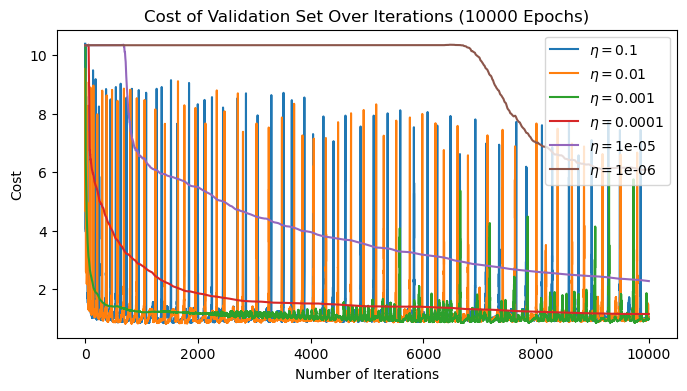

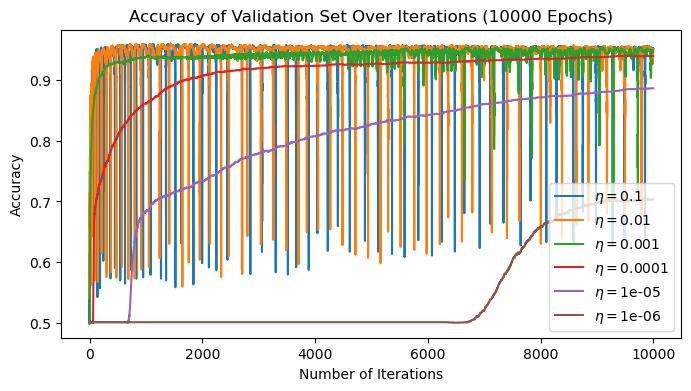

In [61]:
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html
plt.figure(figsize=(8, 4))
plt.figure(1)
plt.figure(figsize=(8, 4))
plt.figure(2)

learning_rates = [0.1, 0.01, 0.001, 0.005, 0.0001, 0.00001]

for learning_rate in learning_rates:
    print('training with learning rate = ', learning_rate)
    model = CustomLogisticRegression(learning_rate)
    model.fit(X_train_b, y_train, X_val_b, y_val, N_EPOCHS)
    plt.figure(1)
    # Reference: https://blog.csdn.net/weixin_41608328/article/details/105227240
    plt.plot(range(N_EPOCHS), model.val_losses,
             label=r'$\eta=$'+str(learning_rate))
    plt.figure(2)
    plt.plot(range(N_EPOCHS), (1-np.array(model.val_misclassifications)),
             label=r'$\eta=$'+str(learning_rate))

plt.figure(1)
plt.legend(loc='upper right')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost of Validation Set Over Iterations (10000 Epochs)')
save_fig("d4_training_loss2", tight_layout=False)
plt.figure(2)
plt.legend(loc='lower right')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy of Validation Set Over Iterations (10000 Epochs)')
save_fig("d4_accuracy2", tight_layout=False)
plt.show()

In [63]:
my_learning_rate = 0.0001

## Task D5


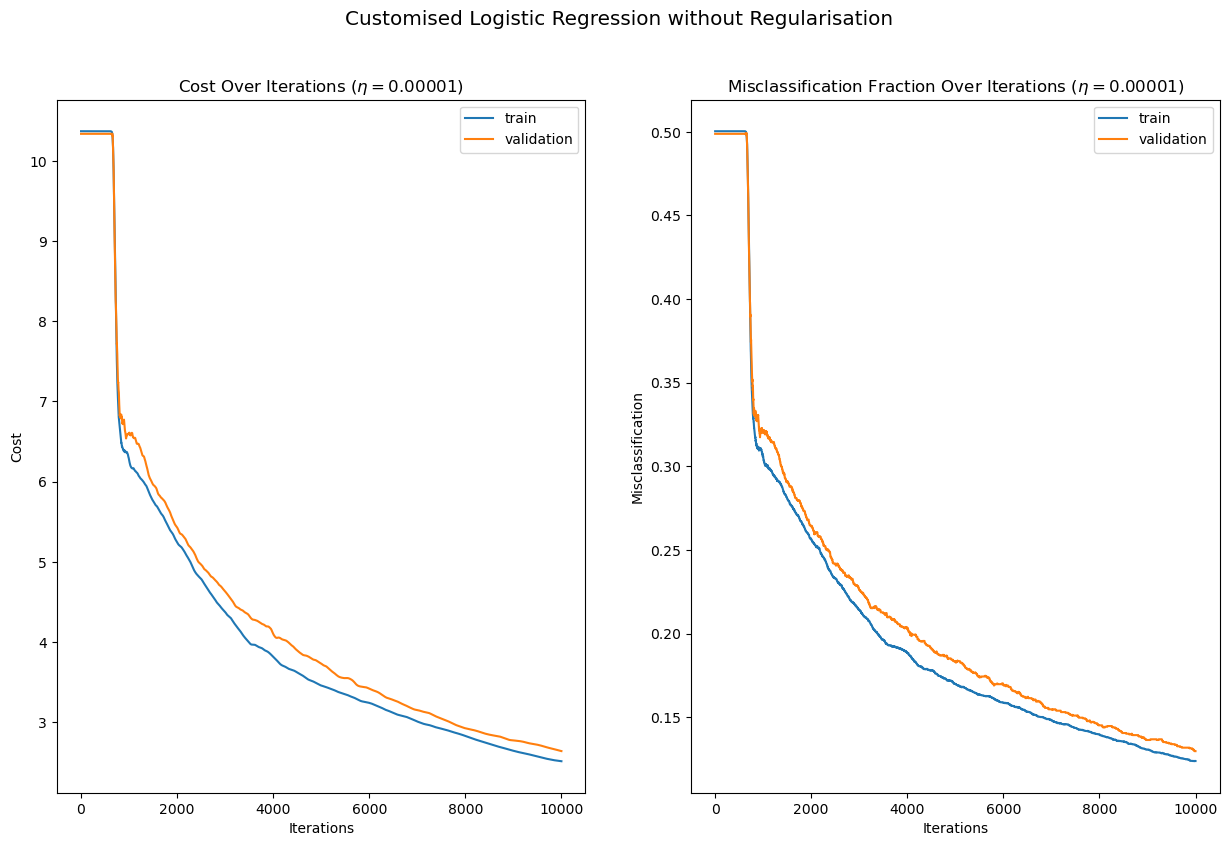

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

model = CustomLogisticRegression(1e-5)
model.fit(X_train_b, y_train, X_val_b, y_val, N_EPOCHS)

ax1.plot(range(N_EPOCHS), model.train_losses, label='train')
ax1.plot(range(N_EPOCHS), model.val_losses, label='validation')
ax2.plot(range(N_EPOCHS), model.train_misclassifications, label='train')
ax2.plot(range(N_EPOCHS), model.val_misclassifications, label='validation')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_title(r'Cost Over Iterations')
ax1.legend(loc='upper right')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Misclassification')
ax2.set_title(r'Misclassification Fraction Over Iterations')
ax2.legend(loc='upper right')
fig.suptitle(
    r'Customised Logistic Regression without Regularisation ($\eta=1e-5$)', fontsize='x-large')
save_fig("d5", tight_layout=False)
plt.show()

## Task D6


# Logistic Regression with L2 Regularisation

You will incorporate a L2 regularisation in your model. Your first task is to select an optimal value for the regularisation hyperparameter C (the hyperparameter α in the textbook) in the training set using the fixed validation set. You must use the same number of iterations as before and explore penalty strength values in the range given by np.logspace(-10, 5, 30) (this function will generate 30 numbers spaced evenly on a log scale).


In [67]:
#! what learning rate should we choose for D7?
class CustomLogisticRegressionL2():
    def __init__(self, learning_rate, C):
        self.learning_rate = learning_rate
        self.alpha = C
        # self.tolerance = 1e-10
        # self.converged = False

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    # Reference: https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1/(1+z)
        else:
            z = np.exp(x)
            return z/(1+z)

    def compute_cost(self, y_true, y_pred):
        epsilon = 1e-9
        loss = -(y_true * np.log(y_pred + epsilon) +
                 (1-y_true) * np.log(1 - y_pred + epsilon))
        regularisation_term = self.alpha*np.sum(self.theta**2)/2
        return np.mean(loss+regularisation_term)

    def compute_gradients(self, x, y_true, y_pred, n_samples):
        difference = y_pred-y_true
        gradients = np.matmul(difference, x) + self.alpha*self.theta
        return gradients/n_samples

    def fit(self, x, y, n_epochs):   # y.shape (m,)   x.shape(m,n)
        n_samples, n_features = x.shape
        self.theta = np.random.rand(n_features)  # (n,)
        # previous_loss = -float('inf')

        for i in range(n_epochs):
            z = np.matmul(x, self.theta)
            pred = self._sigmoid(z)  # estimate probability
            gradients = self.compute_gradients(x, y, pred, n_samples)
            self.theta -= self.learning_rate*gradients

            # loss = self.compute_cost(y, pred)

            # if abs(previous_loss - loss) < self.tolerance or loss < 0.1:
            #     self.converged = True
            #     print('Converged at number of epoch: ',
            #           i, ', final loss = ', loss)
            #     break
            # else:
            #     previous_loss = loss

    def predict_prob(self, x):
        pred = self._sigmoid(np.matmul(x, self.theta))
        return pred

    def predict(self, pred):
        threshold = 0.5
        class_pred = [1 if p > threshold else 0 for p in pred]
        return np.array(class_pred)

    def compute_log_loss(self, y_true, y_pred):
        epsilon = 1e-9
        loss = -(y_true * np.log(y_pred + epsilon) +
                 (1-y_true) * np.log(1 - y_pred + epsilon))
        return np.mean(loss)

    def evaluate_model(self, x, y):
        '''Compute cost and get misclassification fraction
        '''
        pred_prob = self.predict_prob(x)
        class_pred = self.predict(pred_prob)
        misclassification = 1 - accuracy_score(y, class_pred)
        loss = self.compute_cost(y, pred_prob)
        return loss, misclassification

In [107]:
# Reference: https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59
# https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/
# https://github.com/jstremme/l2-regularized-logistic-regression/blob/master/scikit-learn_comparison.ipynb


# Assume C = alpha. Alpha is regularisation strength
C_range = np.logspace(-10, 5, 30)

train_losses = []
train_misclassifications = []
val_losses = []
val_misclassifications = []


count = 1
for C in C_range:
    print(f'Training for the {count}/30 C = {C}')
    count += 1
    model = CustomLogisticRegressionL2(my_learning_rate, np.longdouble(C))
    model.fit(X_train_b, y_train, N_EPOCHS)

    train_loss, train_misclassification = model.evaluate_model(
        X_train_b, y_train)
    train_losses.extend([train_loss])
    train_misclassifications.extend([train_misclassification])

    val_loss, val_misclassification = model.evaluate_model(
        X_val_b, y_val)
    val_losses.extend([val_loss])
    val_misclassifications.extend([val_misclassification])

    print(f'train loss = {train_loss}, train misclassification = {
        train_misclassification}')

Training for the 1/30 C = 1e-10


## Task D7

In the left plot, show the values of the cost function (y-axis) for each C value (x-axis) for the
training and validation sets. That is, your plot should contain two results.
In the right plot, show the fraction of misclassifications (y-axis) for each C value (x-axis) using the logistic regression model prediction for a threshold of 0.5. Similarly, you should provide two results (one for the training and one for the validation set).


In [ ]:
# train_losses[-1] = float('inf')
# val_losses[-1] = float('inf')
# train_losses[-2] = float('inf')
# val_losses[-2] = float('inf')

When the misclassification rate is the smallest, C value = 1e-10, the validation misclassification rate is 0.06130108423686409


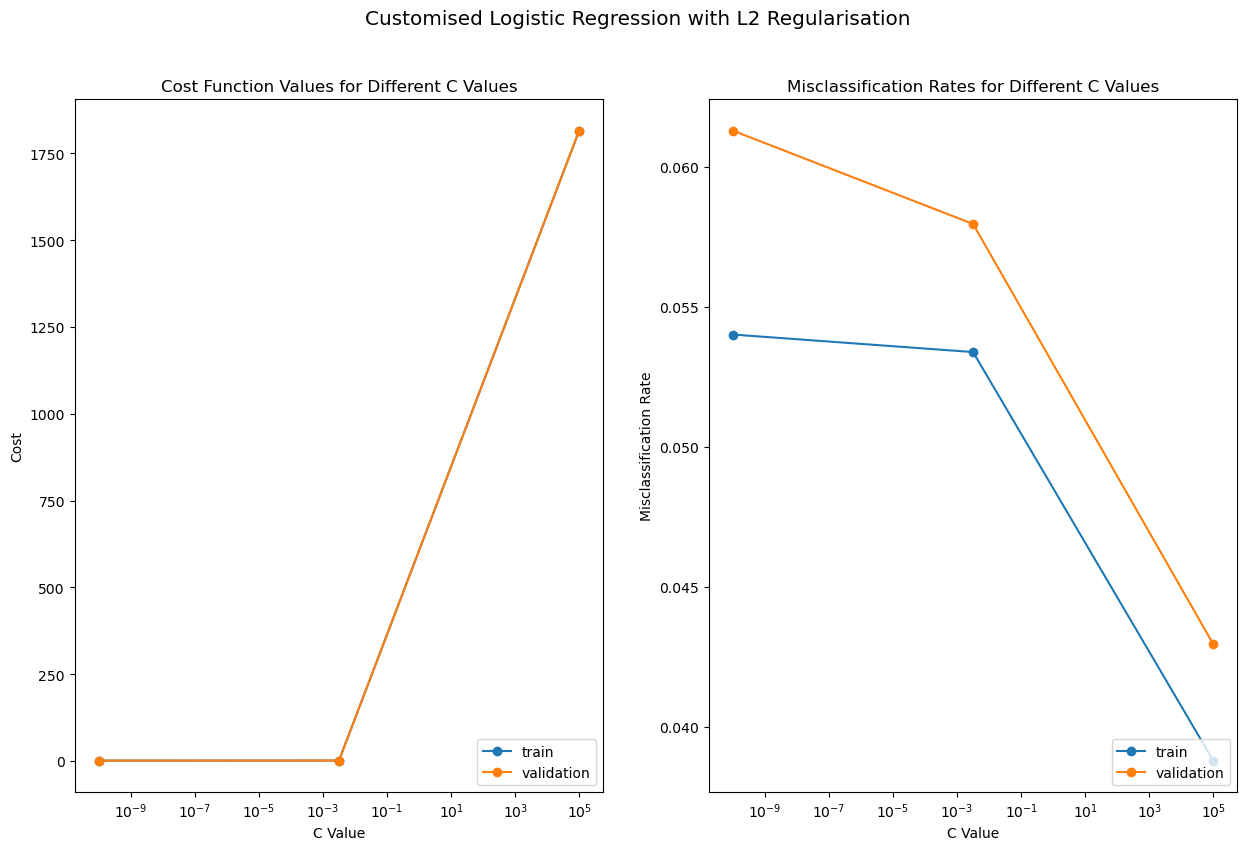

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

idx_min_loss = np.argmin(val_losses)
idx_min_misclassification = np.argmin(val_misclassifications)

print(f'When the misclassification rate is the smallest, C value = {
      C_range[idx_min_loss]}, the validation misclassification rate is {val_misclassifications[idx_min_loss]}')
my_best_c = C_range[idx_min_loss]

ax1.plot(C_range, train_losses, label='train', marker='o')
ax1.plot(C_range, val_losses, label='validation', marker='o')
ax2.plot(C_range, train_misclassifications, label='train', marker='o')
ax2.plot(C_range, val_misclassifications, label='validation', marker='o')

ax1.set_xlabel('C Value')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylabel('Cost')
ax1.set_title(r'Cost Function Values for Different C Values')
ax1.legend(loc='lower right')
ax2.set_xlabel('C Value')
ax2.set_ylabel('Misclassification Rate')
ax2.set_title(r'Misclassification Rates for Different C Values')
ax2.legend(loc='lower right')
fig.suptitle(
    'Customised Logistic Regression with L2 Regularisation', fontsize='x-large')
save_fig("d7", tight_layout=False)
plt.show()

## Task D8


In [71]:
# It is important to scale the data (e.g., using a StandardScaler) before performing ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized models. (Source: Textbook)
from sklearn.preprocessing import StandardScaler

# Reference: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/?ref=header_search
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)
x_val_scaled = std_scaler.transform(X_val)
x_test_scaled = std_scaler.transform(test_set)

In [74]:
# https://www.educative.io/answers/how-to-implement-crossvalscore-in-sklearn
from sklearn.linear_model import LogisticRegressionCV

C_range = np.logspace(-10, 5, 30)
C_inverse_float = [float(1/c) for c in C_range]

model = LogisticRegressionCV(
    Cs=C_inverse_float, cv=10, random_state=5508, penalty='l2', max_iter=N_EPOCHS, scoring='neg_log_loss')
model.fit(x_train_scaled, y_train)
# https://blog.csdn.net/evolution23/article/details/85028423
neg_losses = np.mean(model.scores_[1], axis=0)
losses = -neg_losses

model = LogisticRegressionCV(
    Cs=C_inverse_float, cv=10, random_state=5508, penalty='l2', max_iter=N_EPOCHS, scoring='accuracy')
model.fit(x_train_scaled, y_train)
cv_accuracies = np.mean(model.scores_[1], axis=0)

When the mean cost is the smallest, C value =  78.80462815669937
When the mean classification rate is the smallest, C value =  78.80462815669937
When C value =  78.80462815669937 , it has the smallest mean cost =  0.11463886500349837 , and the biggest accuracy rate =  0.9601668404588113


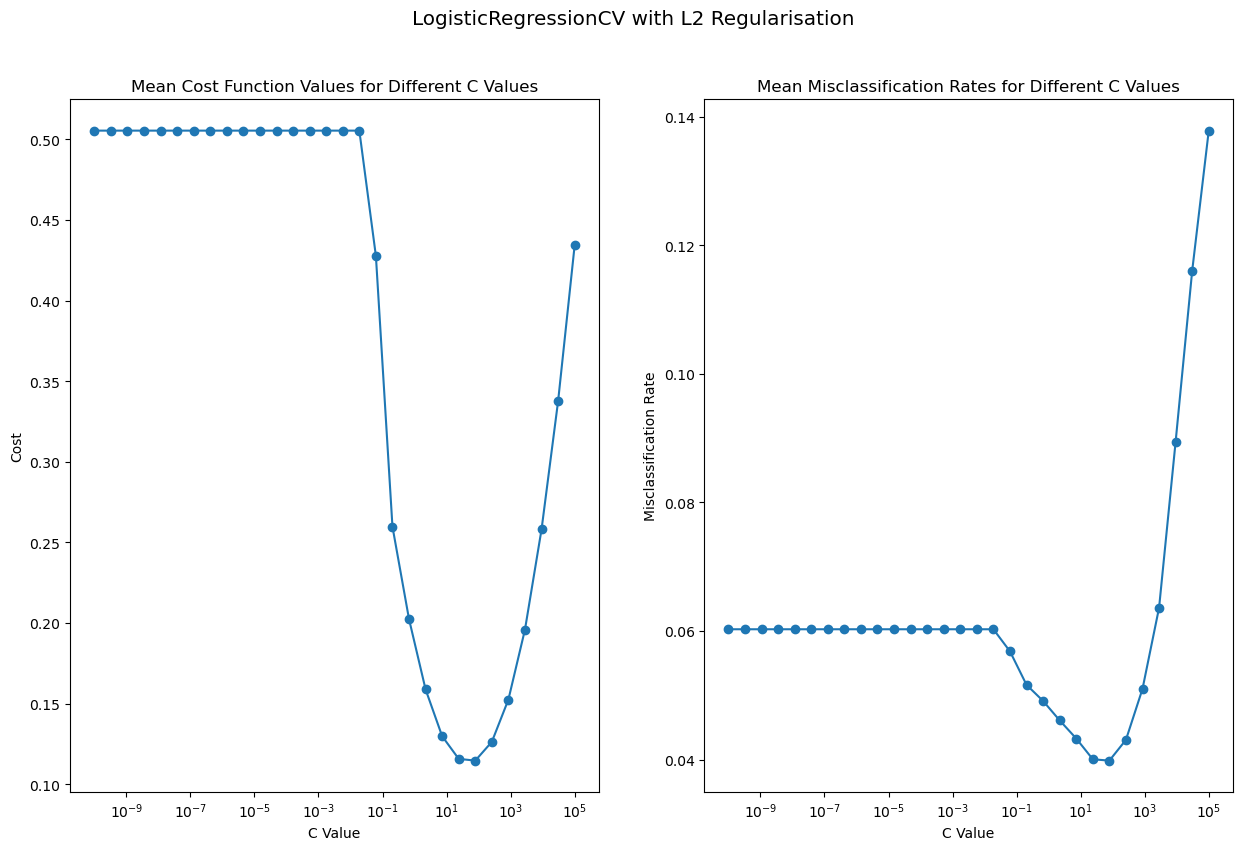

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.plot(C_range, losses, marker='o')
ax2.plot(C_range, 1-cv_accuracies, marker='o')

idx_min_loss = np.argmin(losses)
print('When the mean cost is the smallest, C value=',
      C_range[idx_min_loss], ', 1/C=', 1/C_range[idx_min_loss])
idx_min_misclassification = np.argmax(cv_accuracies)
print('When the mean classification rate is the smallest, C value = ',
      C_range[idx_min_misclassification], ', 1/C=', C_range[idx_min_misclassification])
print('When C value = ', C_range[idx_min_loss],', it has the smallest mean cost = ',
      losses[idx_min_loss],', and the biggest accuracy rate = ', cv_accuracies[idx_min_loss])

ax1.set_xlabel('C Value')
ax1.set_ylabel('Cost')
ax1.set_title(r'Mean Cost Function Values for Different C Values')
ax2.set_xlabel('C Value')
ax2.set_ylabel('Misclassification Rate')
ax2.set_title(r'Mean Misclassification Rates for Different C Values')
fig.suptitle('LogisticRegressionCV with L2 Regularisation',
             fontsize='x-large')
save_fig("d8", tight_layout=False)
plt.show()

## Task D9

Give a short interpretation of your results. Which regularisation hyperparameter value would you select and why? What was the impacting of using 10-fold cross-validation instead of a fixed validation set?


## Task D10


In [77]:
# Grid search
# https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
# https://github.com/jstremme/l2-regularized-logistic-regression/blob/master/scikit-learn_comparison.ipynb
# https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
# https://juejin.cn/post/7120089516597051428
# https://github.com/scikit-learn/scikit-learn/issues/6619
# https://medium.com/@matthew1992/model-selection-in-machine-learning-f2dc41465230

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


def compute_cost(y_true, y_pred, alpha, weights):
    epsilon = 1e-9
    loss = -(y_true * np.log(y_pred + epsilon) +
             (1-y_true) * np.log(1 - y_pred + epsilon))
    regularisation_term = alpha*np.sum(weights**2)/2
    return np.mean(loss+regularisation_term)


# Define hyperparameter grid
params = {'alpha': C_range}
sgd_classifier = SGDClassifier(
    loss='log_loss', penalty='l2', max_iter=N_EPOCHS, random_state=5508)
# Perform grid search cross-validation to find the best value of C
gs_sgd = GridSearchCV(
    sgd_classifier, param_grid=params, cv=10, scoring='accuracy')
gs_sgd.fit(x_train_scaled, y_train)

# Get the best value of C
best_alpha = gs_sgd.best_params_['alpha']
best_C = best_alpha
print('best C is ', best_C)


best_model = SGDClassifier(
    loss='log_loss', penalty='l2', alpha=best_C, max_iter=N_EPOCHS, random_state=5508)
best_model.fit(x_train_scaled, y_train)

weights = best_model.coef_.flatten()
train_pred = best_model.predict_proba(x_train_scaled)
val_pred = best_model.predict_proba(x_val_scaled)
train_loss = compute_cost(y_train, train_pred[:, 1], best_C, weights)
val_loss = compute_cost(y_val, val_pred[:, 1], best_C, weights)
train_accuracy = best_model.score(x_train_scaled, y_train)
val_accuracy = best_model.score(x_val_scaled, y_val)

best C is  0.005736152510448681


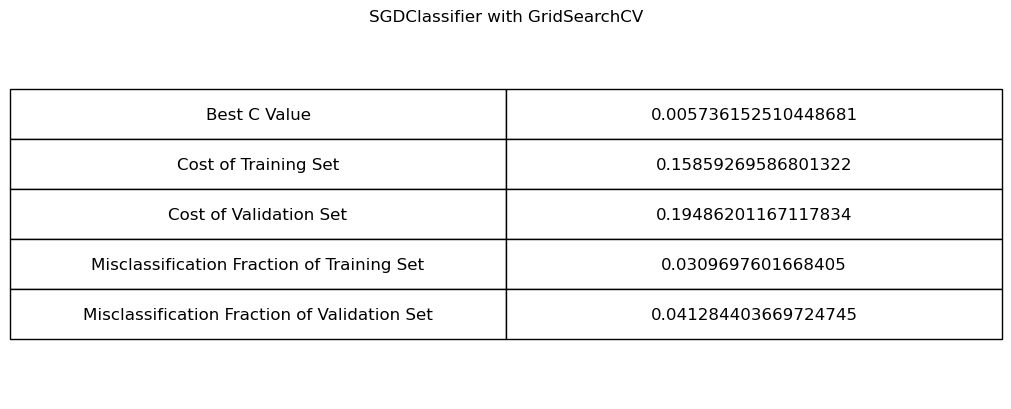

In [78]:
table_content = [['Best C Value', best_C], ['Cost of Training Set', train_loss], [
    'Cost of Validation Set', val_loss], ['Misclassification Fraction of Training Set', 1-train_accuracy], ['Misclassification Fraction of Validation Set', 1-val_accuracy]]

# Reference: https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
# ax.axis('tight')

table = ax.table(cellText=table_content, loc='center', cellLoc='center')
ax.set_title('SGDClassifier with GridSearchCV', fontsize='large')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust cell heights and widths
table.scale(2, 3)
save_fig("d10", tight_layout=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Task D12


In [87]:
# Train logistic regression model with the best value of C
best_model = SGDClassifier(
    loss='log_loss', penalty='l2', alpha=best_C, max_iter=N_EPOCHS, random_state=5508)
best_model.fit(x_train_scaled, y_train)
LR3 = best_model

In [88]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(best_model, x_val_scaled, y_val, cv=10,
                             method="predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores[:, 1])

precision and recall intersect at threshold value of  0.6272692231517724


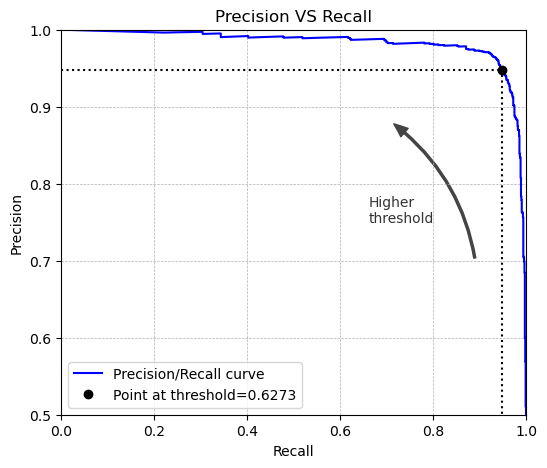

<Figure size 640x480 with 0 Axes>

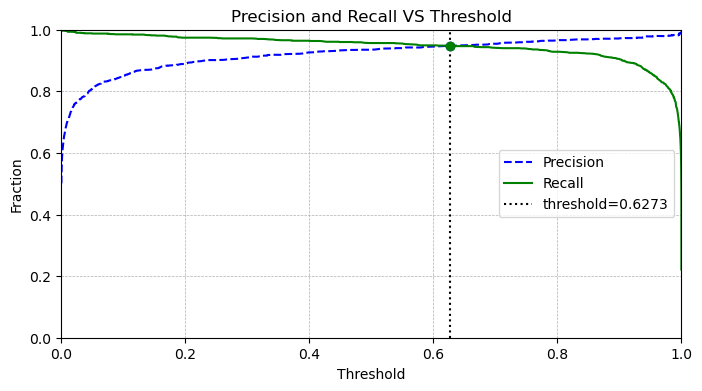

In [89]:
import matplotlib.patches as patches

idx = 0
for i in range(len(thresholds)):
    if precisions[i] == recalls[i]:
        idx = i
threshold = thresholds[idx]
print('precision and recall intersect at threshold value of ', threshold)


plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, "b-", linewidth=1.5,
         label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold="+str(threshold.round(4)))
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.89, 0.70), (0.71, 0.88),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.66, 0.75, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision VS Recall')
plt.axis([0, 1, 0.5, 1])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(loc="lower left")
plt.show()
save_fig("d12_precision_vs_recall",
         tight_layout=False, bbox_inches='tight')

plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=1.5)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=1.5)
plt.vlines(threshold, 0, 1.0, "k", "dotted",
           label="threshold="+str(threshold.round(4)))
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([0, 1, 0, 1])
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Threshold")
plt.ylabel("Fraction")
plt.title('Precision and Recall VS Threshold')
plt.legend(loc="center right")
save_fig("d12_precision_recall_vs_threshold_plot",
         tight_layout=False, bbox_inches='tight')
plt.show()

The precision and recall curves intersect at approximately the threshold value of 0.6273, indicating a point of balance between precision and recall. Initially, the precision value starts at 0.5 and then gradually ascends to a high fraction at around 0.95. Conversely, the recall curve exhibits a steep decrease following its intersection with the precision curve.

I opt for a threshold value of 0.58 (rounded to 2 decimal places) which closely aligns with the intersection point of the precision and recall curves. This choice is motivated by the fact that at this threshold, both precision and recall hover around 95%. Such high values imply that instances predicted as class label 1 are mostly correct, and nearly all actual instances with class label 1 are accurately predicted. Consequently, the model demonstrates high accuracy and completeness in its positive predictions.


## Task D13


In [106]:
# task d13: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
# https://vitaliset.github.io/threshold-dependent-opt/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
# https://vitaliset.github.io/threshold-dependent-opt/


# Use f1 score as the metric to find the optimal threshold

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

threshold_values = np.linspace(0, 1, 100)
best_threshold = None
best_auc = -1
best_accuracy = -1
best_auc_threshold = None
best_accuracy_threshold = None

sgd_clf = SGDClassifier(
    loss='log_loss', penalty='l2', alpha=best_C, max_iter=N_EPOCHS, random_state=5508)
y_pred = cross_val_predict(sgd_clf, x_train_scaled,
                           y_train, cv=10, method='predict_proba')

LR4 = sgd_clf


for threshold in threshold_values:
    performance = -1
    y_class_pred = [1 if p > threshold else 0 for p in y_pred[:, 1]]
    auc = roc_auc_score(y_train, y_class_pred)
    accuracy = accuracy_score(y_train, y_class_pred)

    if auc > best_auc:
        best_auc = auc
        best_auc_threshold = threshold

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_threshold = threshold

print('best auc threshold: ', best_auc_threshold)
print('best auc: ', best_auc)
print('best accuracy threshold: ', best_accuracy_threshold)
print('best accuracy: ', best_accuracy)
best_threshold = best_auc_threshold.round(4)
print('best threshold: ', best_threshold)

best auc threshold:  0.5454545454545455
best auc:  0.9598535422035196
best accuracy threshold:  0.5454545454545455
best accuracy:  0.9598540145985401
best threshold:  0.5455


The threshold value I obtained from implementing a grid search on our own is around 0.5455. Though the value is not far from what I obtained in D10, there is still a significant difference because I chose the D10 optimal threshold roughly based on the curve where both precision and recall is above 0.95. The threshold value found in D13 is based on the highest AUC score, F1-score, and accuracy score, which balances the precision and recall.

# Analysing the performance closer


## Task D14


In [91]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_cm_and_table(model_name, figure_name, confusion_matrix, precision, recall, fpr):

    table_data = [['Precision', precision], ['Recall', recall], [
        'FPR', fpr]]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[0, 1])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    disp.plot(ax=ax1, cmap='Blues')
    ax1.set_title('Confusion Matrix')

    ax2.axis('off')
    ax2.axis('tight')
    ax2.margins(x=0, y=0)

    table = ax2.table(cellText=table_data, loc='center', cellLoc='center')

    # Adjust font size
    table.auto_set_font_size(False)

    table.set_fontsize(13)

    # Adjust cell heights and widths
    table.scale(1, 7)
    fig.suptitle(model_name, fontsize='xx-large')

    save_fig(figure_name, tight_layout=True,
             bbox_inches='tight', pad_inches=0.05)
    plt.show()

### LR1

My implementation of the logistic regression without regularisation and with a fixed validation set.


In [92]:
def my_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[tn, fp], [fn, tp]])


def precision_recall_fpr(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return precision, recall, fpr

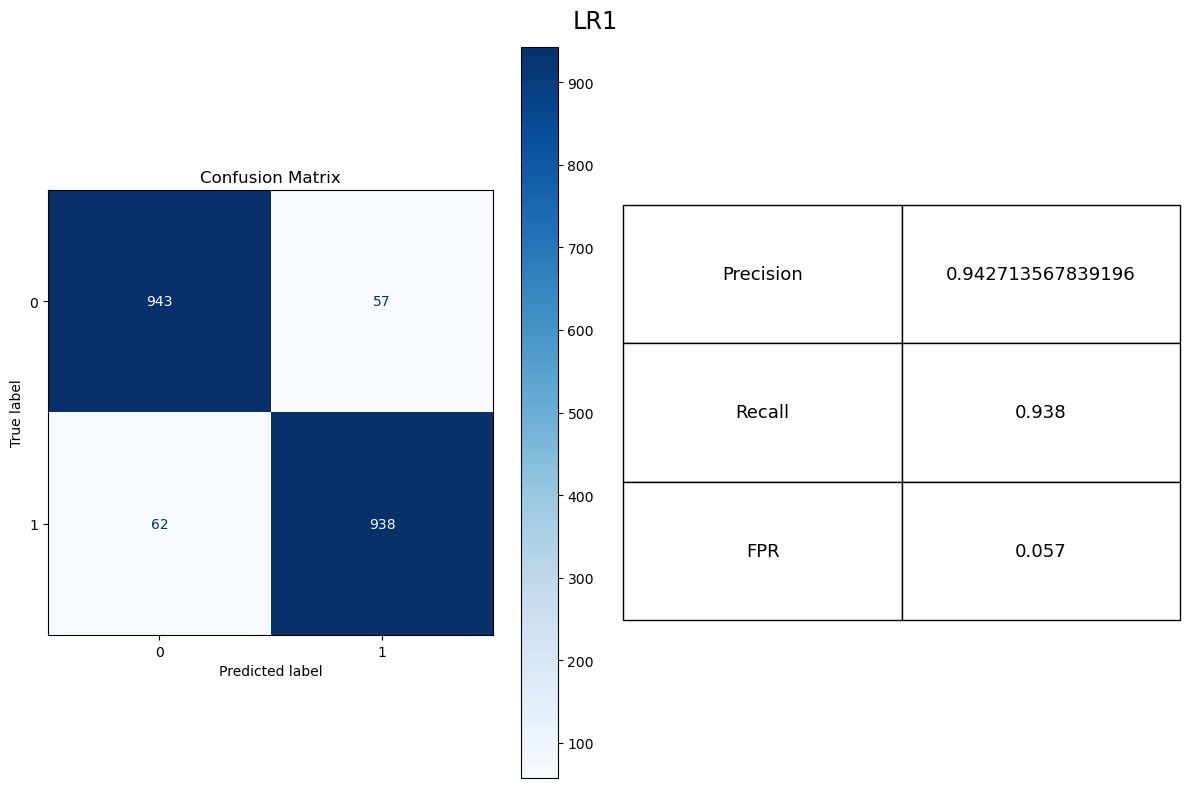

In [96]:
model = CustomLogisticRegression(my_learning_rate)
model.fit(X_train_b, y_train, X_val_b, y_val, N_EPOCHS)
LR1 = model
LR1_y_pred = LR1.predict(X_test_b)
y_test = test_labels
LR1_cm = my_confusion_matrix(y_test, LR1_y_pred)

LR1_precision, LR1_recall, LR1_fpr = precision_recall_fpr(LR1_cm)
plot_cm_and_table('LR1', 'd14_lr1', LR1_cm, LR1_precision, LR1_recall, LR1_fpr)

### LR2


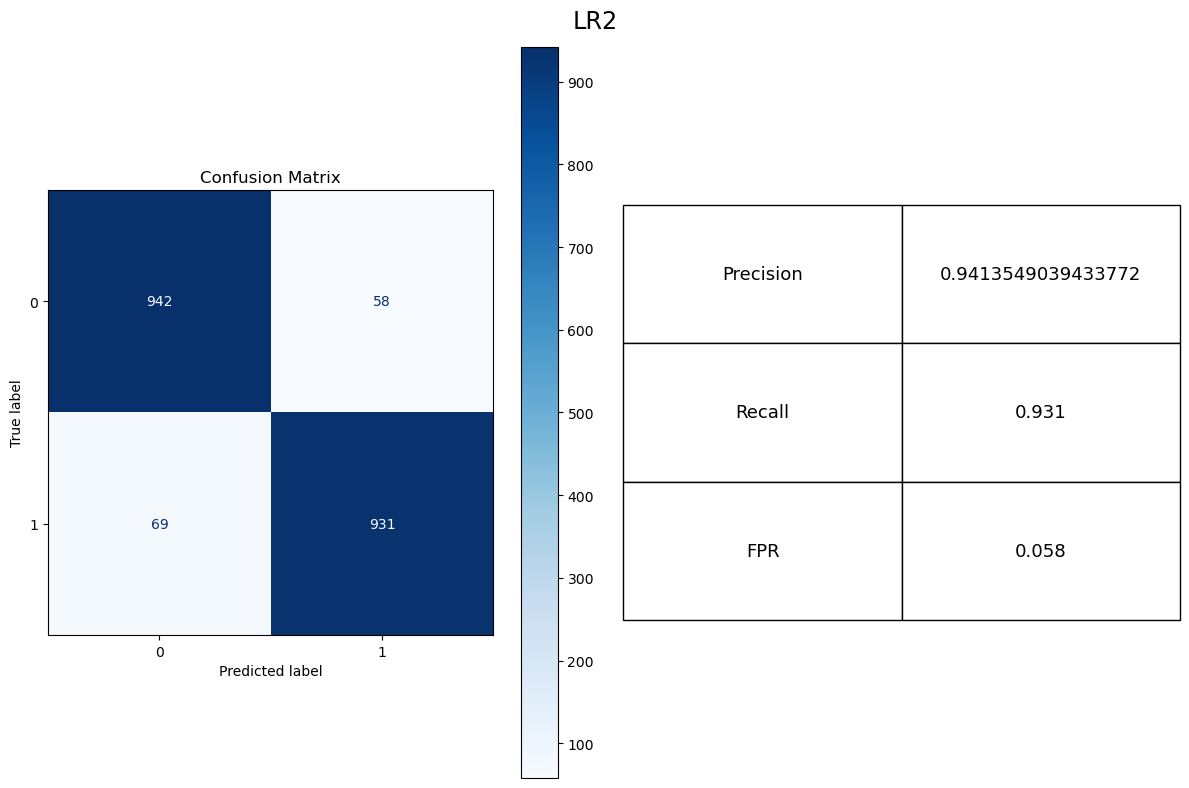

In [97]:
LR2 = CustomLogisticRegressionL2(my_learning_rate, np.longdouble(my_best_c))
LR2.fit(X_train_b, y_train, N_EPOCHS)
LR2_pred = LR2.predict_prob(X_test_b)
LR2_class_pred = LR2.predict(LR2_pred)
LR2_cm = my_confusion_matrix(y_test, LR2_class_pred)

LR2_precision, LR2_recall, LR2_fpr = precision_recall_fpr(LR2_cm)
plot_cm_and_table('LR2', 'd14_lr2', LR2_cm, LR2_precision, LR2_recall, LR2_fpr)

### LR3


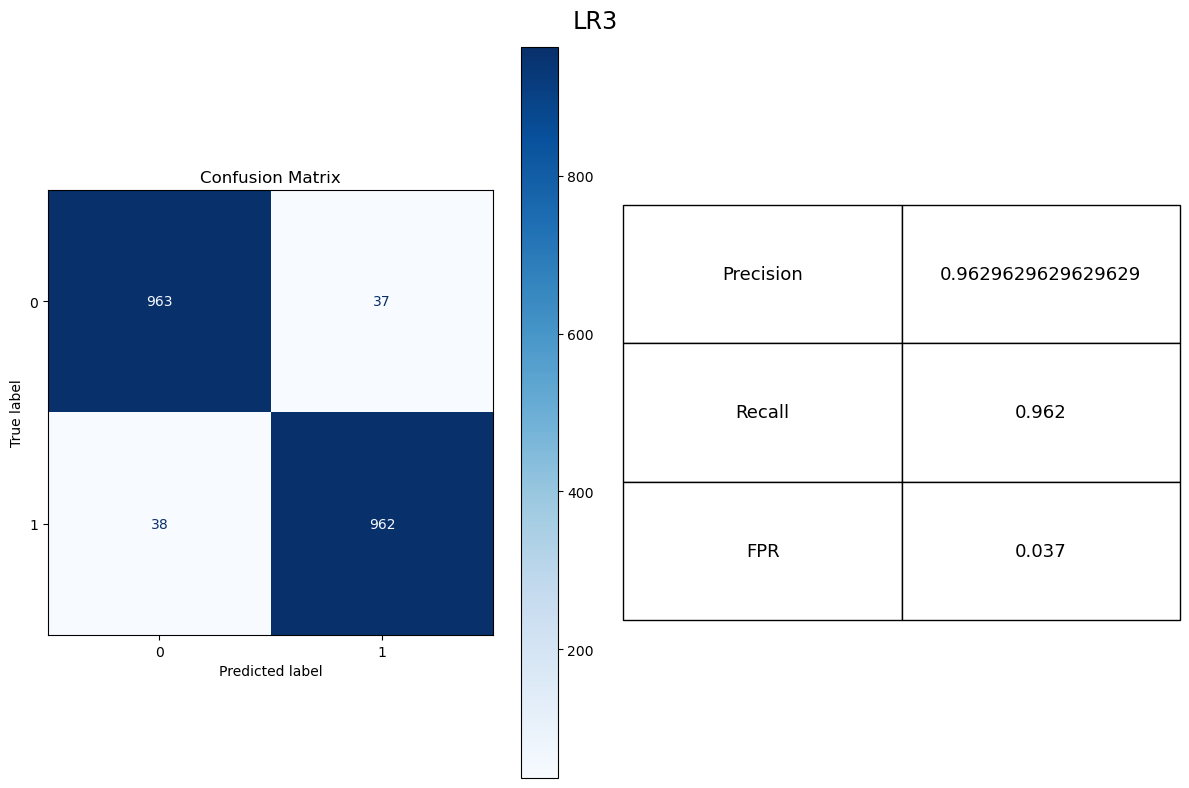

In [98]:
# confusion matrix and fpr: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# precision score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# confusion matrix display: https://medium.com/@anthony.demeusy/machine-learning-tips-adjusting-decision-threshold-for-binary-classification-c937d7046a43
# confusion matrix display: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# how to get fp and tn for fpr_socre: https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
from sklearn.metrics import confusion_matrix, precision_score, recall_score


def get_cm_precision_recall_fpr(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp/(fp+tn)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return cm, precision, recall, fpr


LR3_pred = LR3.predict(x_test_scaled)
LR3_cm, LR3_precision, LR3_recall, LR3_fpr = get_cm_precision_recall_fpr(
    y_test, LR3_pred)
plot_cm_and_table('LR3', 'd14_lr3', LR3_cm, LR3_precision, LR3_recall, LR3_fpr)

### LR4


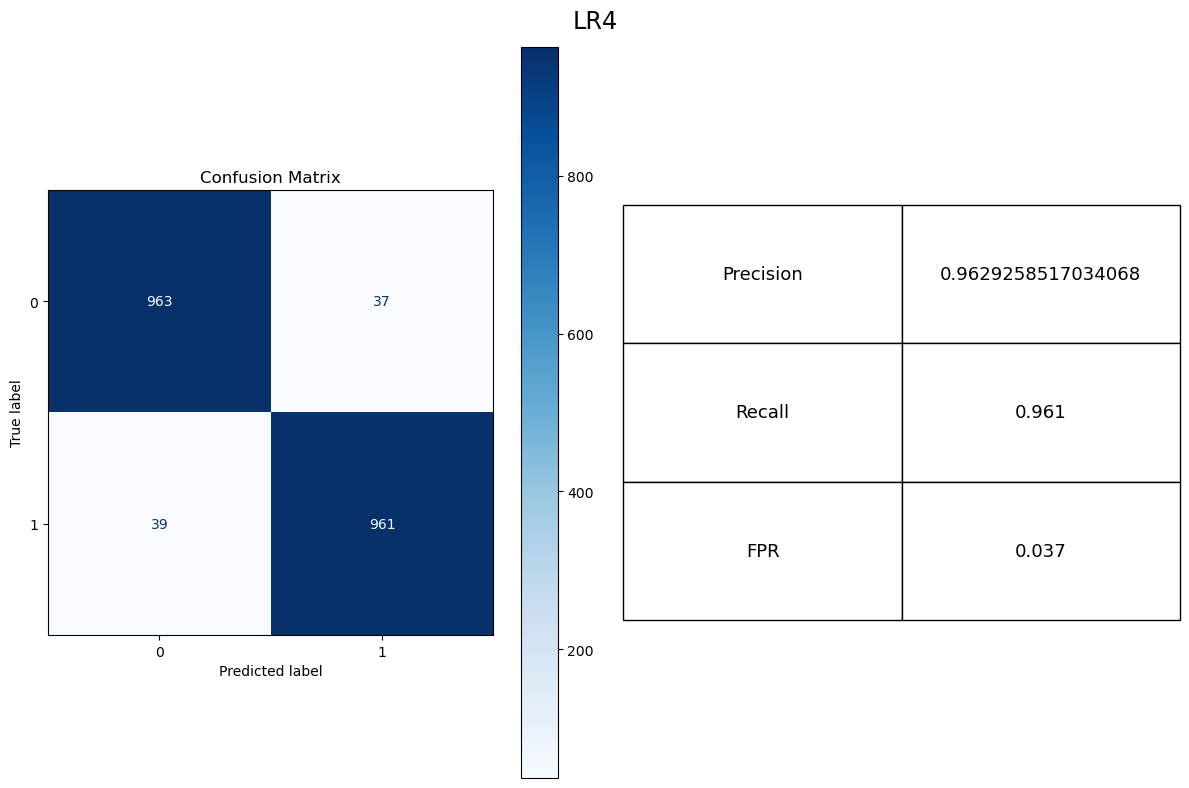

In [99]:
# https://stackoverflow.com/questions/61034101/scikit-learn-change-threshold-in-confusion-matrix
LR4.fit(x_train_scaled, y_train)
LR4_pred_prob = LR4.predict_proba(x_test_scaled)
LR4_class_pred = [1 if p > best_threshold else 0 for p in LR4_pred_prob[:, 1]]
LR4_cm, LR4_precision, LR4_recall, LR4_fpr = get_cm_precision_recall_fpr(
    y_test, LR4_class_pred)
plot_cm_and_table('LR4', 'd14_lr4', LR4_cm, LR4_precision, LR4_recall, LR4_fpr)

## Task D15

## Task D16

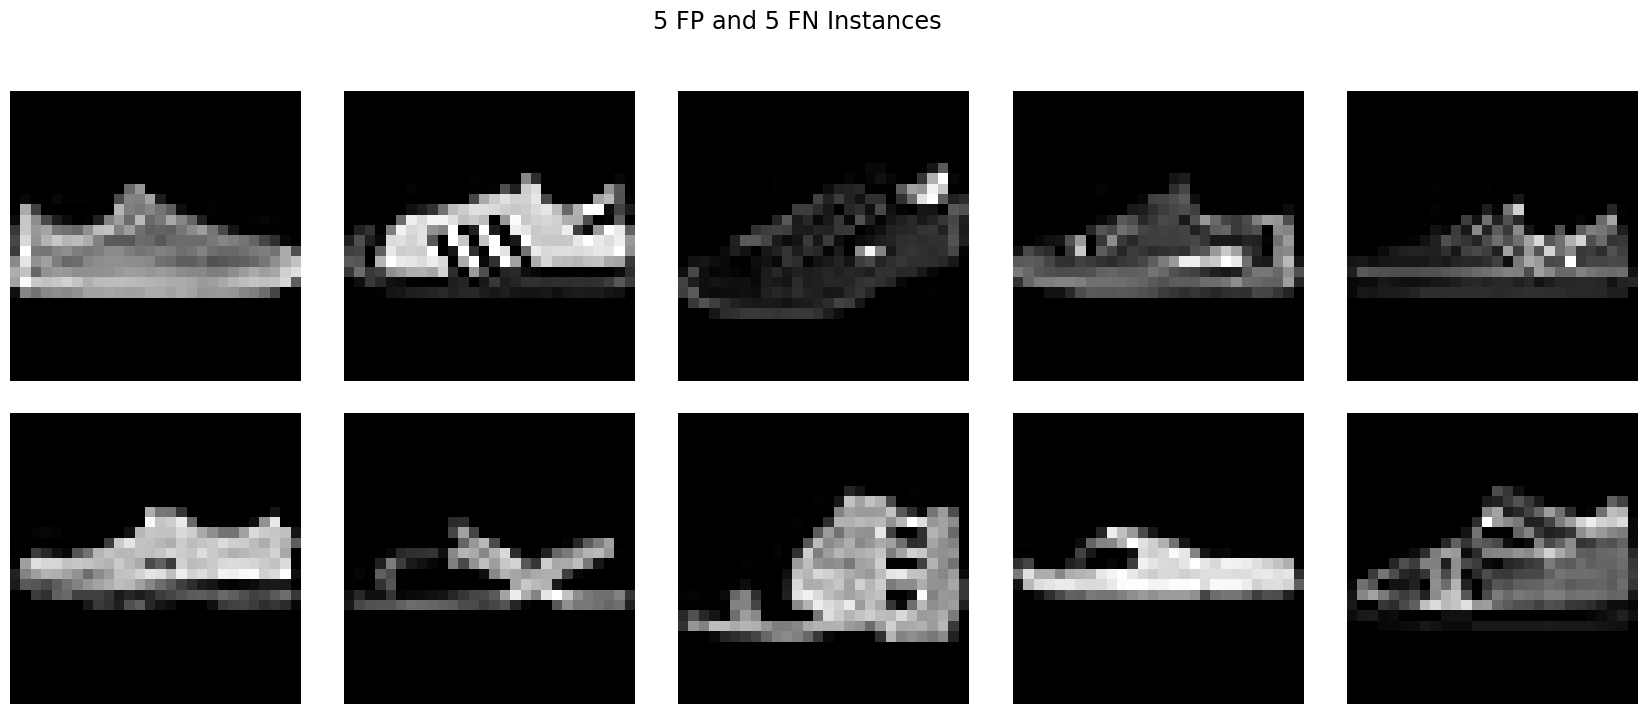

In [100]:
import matplotlib.pyplot as plt
count_fp = 0  # predicted to be true, but is wrong
count_fn = 0  # predicted to be false, but is wrong
found_5_fp = False
found_5_fn = False
fp_idx = []
fn_idx = []
fp_example_ids = []
fn_example_ids = []

# 1: sandal, 0: sneaker
for i in range(len(y_test)):
    if not found_5_fp and LR4_class_pred[i] == 1 and y_test.iloc[i] == 0:
        count_fp += 1
        fp_idx.extend([i])
        fp_example_ids.extend([y_test.index[i]])
        if count_fp == 5:
            found_5_fp = True
    elif not found_5_fn and LR4_class_pred[i] == 0 and y_test.iloc[i] == 1:
        count_fn += 1
        fn_idx.extend([i])
        if count_fn == 5:
            found_5_fn = True
        fn_example_ids.extend([y_test.index[i]])
    if found_5_fp and found_5_fn:
        break


fp_data = test_set.iloc[fp_idx]
fn_data = test_set.iloc[fn_idx]
images_data = pd.concat([fp_data, fn_data], axis=0)


def plot_shoe1(image_data):

    image = image_data.reshape(28, 28)
    # title = 'example '+str(id)+' y='+str(label)
    plt.imshow(1-image, cmap="binary")
    plt.axis("off")
    # plt.title(title, fontsize=20)


plt.figure(figsize=(21, 8))
for idx, image_data in enumerate(images_data.to_numpy()):
    plt.subplot(2, 5, idx + 1)
    plot_shoe1(image_data)

plt.subplots_adjust(wspace=0.15, hspace=0.1)
plt.suptitle('5 FP and 5 FN Instances', fontsize='xx-large')
save_fig("d16_shoes_plot", tight_layout=False)
plt.show()

## Task D17

d17:
fp fn rate of model

## Task D18

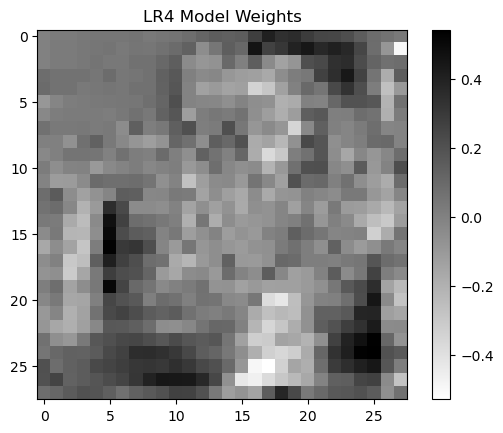

In [101]:
weights = LR4.coef_
weights_matrix = weights.reshape(28, 28)
# Plot the weights matrix as an image
plt.imshow(weights_matrix, cmap='binary')
plt.title('LR4 Model Weights')
plt.colorbar()  # Add colorbar to show the range of weights
save_fig("d18_model_weights", tight_layout=False)
plt.show()

In [102]:
weights

array([[ 0.00000000e+00,  2.75233157e-02,  2.75233157e-02,
         3.78671223e-02,  4.90583718e-02,  4.65138376e-02,
         4.90583718e-02,  5.51511161e-02,  3.41399275e-02,
         4.61706146e-02,  5.71839296e-02,  7.91795578e-02,
         1.18750384e-01,  1.51744977e-01,  1.39162379e-01,
         1.51069541e-01,  2.75843815e-01,  4.01843470e-01,
         3.41927100e-01,  3.57573328e-01,  2.92265948e-01,
         2.46890830e-01,  2.45065167e-01,  2.16099207e-01,
         1.49970540e-01,  8.82052381e-02,  5.81626632e-02,
         3.10558149e-02,  0.00000000e+00,  2.75233157e-02,
         2.75233157e-02,  3.78671223e-02,  4.90583718e-02,
         5.70791557e-02,  3.56209663e-02,  5.00250973e-02,
         4.83278670e-02,  6.20842848e-02,  9.40269540e-02,
         1.32851697e-01, -5.08749969e-02,  4.68599877e-02,
         1.45712718e-01,  1.04210820e-01,  4.59600636e-01,
         2.62895088e-01,  3.11184042e-01,  3.96446257e-01,
         4.47082023e-01,  3.69153116e-01,  4.05336546e-0

The very white area has a large positive weight, the very black areas have large negative weights, 

# Comparing models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_train_misclassifications = []
knn_val_misclassifications = []

for k in range(1, 31):
    print(f'training k = {k}')
    knn_cls = KNeighborsClassifier(n_neighbors=k)  # default euclidean
    knn_cls.fit(x_train_scaled, y_train)
    train_pred = knn_cls.predict(x_train_scaled)
    train_misclassification = 1-accuracy_score(y_train, train_pred)
    knn_train_misclassifications.extend([train_misclassification])
    val_pred = knn_cls.predict(x_val_scaled)
    val_misclassification = 1-accuracy_score(y_val, val_pred)
    knn_val_misclassifications.extend([val_misclassification])

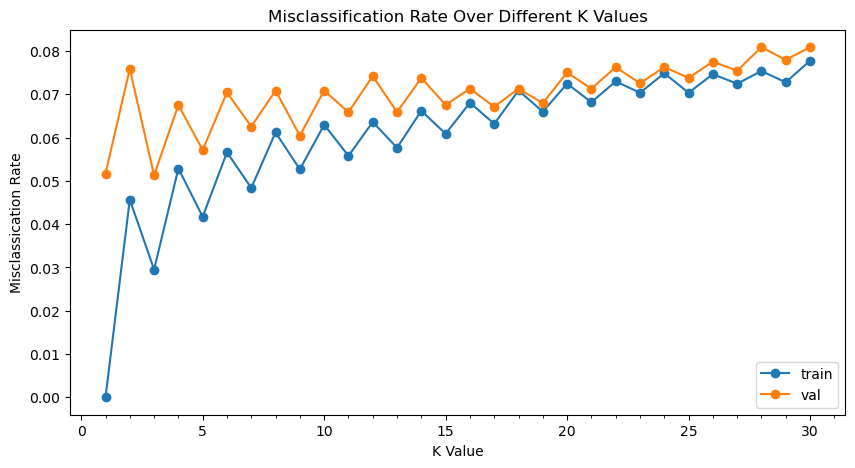

In [104]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(range(1, 31), knn_train_misclassifications, label='train', marker='o')
plt.plot(range(1, 31), knn_val_misclassifications, label='val', marker='o')
plt.legend(loc='lower right')
plt.xlabel('K Value')
plt.ylabel('Misclassication Rate')
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.title('Misclassification Rate Over Different K Values')
save_fig("d20_training_loss1", tight_layout=False)

## Task D21

## Task D22

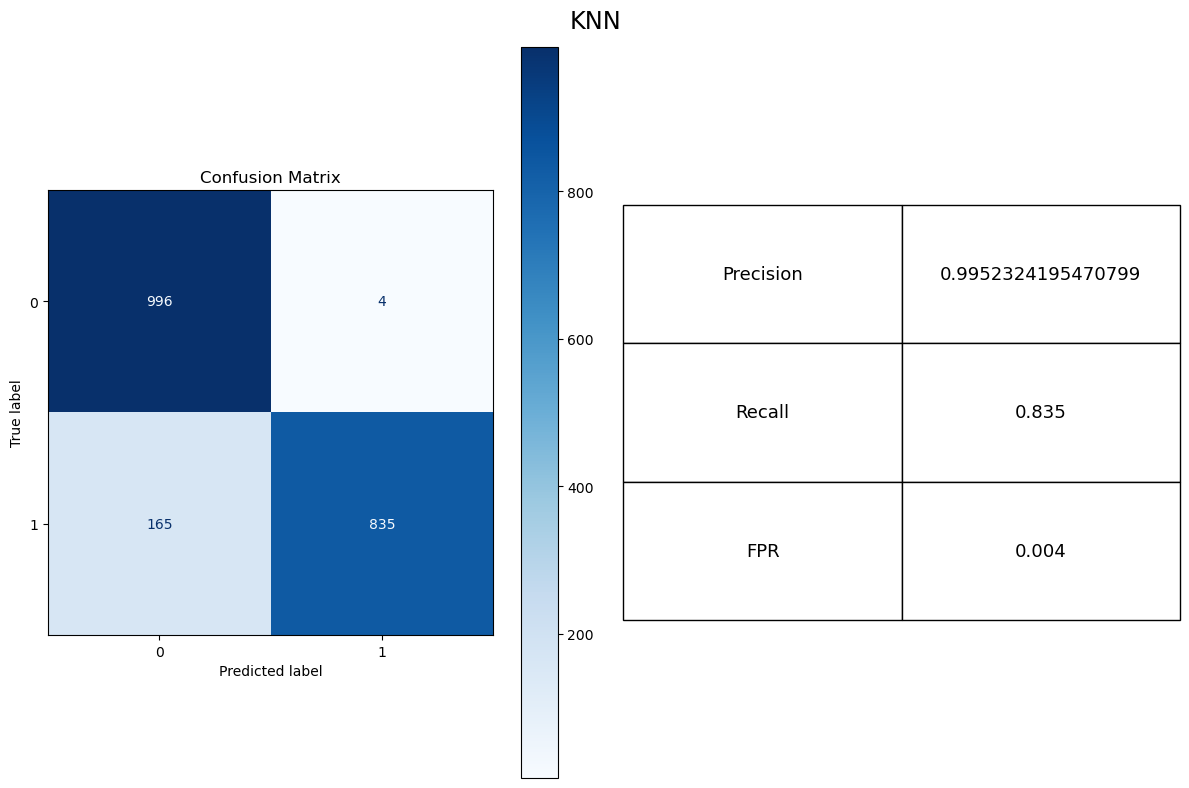

In [105]:
knn_pred = knn_cls.predict(x_test_scaled)

knn_cm, knn_precision, knn_recall, knn_fpr = get_cm_precision_recall_fpr(
    y_test, knn_pred)
plot_cm_and_table('KNN', 'd22_knn_metrics', knn_cm,
                  knn_precision, knn_recall, knn_fpr)

## Task D23

# Exploring the ML Pipeline

## Task D24
The machine leanring pipeline refers to the sequence of steps involved in building, training, evaluating, and deploying a machine learning model. It typically contains the processes of data collection, data preprocessing, feature engineering, model selection, model training, hyperparameter tuning, model evaluation, data augmentation and etc.

1. Data Collection
When collecting data, we can collect more pixel values of images that can be easily misclassified by the algorithms to improve the accuracy. For example, collect more instances that are similar to those false positive and false negative samples shown in task D16, so the model learns to identify those samples more accurately.

2. Data Scaling
We can try different preprocessing methods and see which works the best. For example, we can scale the pixel values from [0,255] to [0,1] by dividing by 255 (MinMax scaling). Or we can use the Standard Scaler to standardises features by subtracting the mean value and then dividing the standard deviation of training samples.

3. Data Augmentation
To increase the diversity of the training data and improve the model's generalisation ability, data augmentation techniques such as rotation, flipping and adding noise can be applied to the images.

4. Feature Engineering
Instead of relying solely on the pixel values of the images, we can also extract additional features from the images. For example, we can create or transform features such as edges and certain areas (a group of pixel values), which might provide additional discriminative information for the classification task.

5. Feature Selection
Not all pixel values are crucial for classifying the images, we can select part of the pixels for classifying. Through observation, we can find that the corners of the images are usually blank. And there are areas that most sample will have similar pixel values, which provides fewer useful information.

6. Model Selection
Select and experiment more appropriate machine learning models for binary classification problem, for example, decision trees, random forest, support vector machines, ensemble methods and so on, not just use logistic regression and k-nearest neighbors.

7. Model Evaluation
When evaluating the model, use metrics such as ROC curve, AUC score, F1 score instead of just using precision, recall, FPR and accuracy. Also, we can incorporate cross-validation to obtain a more accurate score when measuraing the performance of the model, instead of using a fixed validation set.

8. Model Training
During the stage of training, we can set a tolerance for stopping criteria to boost the training speed, so the algorithms do not need to run all iterations we specify. To improve the training speed, we can also use Mini-batch Gradient Descent instead of Batch Gradient Descent in our own implementation of logistic regression.

9. Hyperparameter Tuning
Experiment different combinations of hyperparameters to find the optimal values for different models using techniques such as grid search or random search, instead of determining one hyperparameter each time. For instance, finding the optimal combination of learning rate, regularisation strength, number of epochs and so on.



1. **Feature Engineering**: Feature engineering involves creating new features or transforming existing ones to improve the performance of the model. This can include techniques such as one-hot encoding, feature scaling, dimensionality reduction, and creating interaction terms.

2. **Dimensionality Reduction**: Since the images have high-dimensional pixel values, dimensionality reduction techniques such as Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE) can be applied to reduce the dimensionality of the data while preserving most of the variance. This can help in visualizing and understanding the data better and may improve the model's performance.

3. **Transfer Learning**: Instead of training a model from scratch, we can leverage pre-trained deep learning models such as VGG, ResNet, or Inception, which have been trained on large datasets like ImageNet. We can fine-tune these models on our dataset, potentially achieving better performance with less training data.

4. **Ensemble Methods**: Ensemble methods such as bagging, boosting, or stacking can be employed to combine multiple base models to improve prediction accuracy. This involves training multiple models and combining their predictions using techniques such as majority voting or averaging.

4. **Model Interpretability**: Explore techniques for interpreting and visualizing the model's predictions and decision boundaries. This can help in understanding which features are most important for the classification task and identifying potential areas for improvement.

By implementing these strategies and carefully analyzing the results, we can iteratively improve the modeling process and achieve better performance for the classification of sandals and sneakers.